# Pandas Unpivot implementation

# 1. Import the dataset

In [16]:
import pandas as pd

# Create a sample DataFrame in a "wide" format
data = {
    'Student_ID': [101, 102, 103],
    'Department': ['CS', 'Engineering', 'Business'],
    'Midterm_Score': [85, 78, 92],
    'Final_Score': [90, 82, 95],
    'Assignments_Avg': [88, 75, 90]
}

In [17]:
df_wide = pd.DataFrame(data)

In [18]:
df_wide

,Student_ID,Department,Midterm_Score,Final_Score,Assignments_Avg
0,101,CS,85,90,88
1,102,Engineering,78,82,75
2,103,Business,92,95,90


# 2. Unpivot using melt()

Unpivoting, also known as "melting"  is the inverse operation of pivoting. It transforms data from a "wide" format to a "long" format. In Pandas, the primary method for unpivoting is melt().

What is Unpivoting (melt())?

Imagine you have data where different categories are spread across multiple columns (wide format). Unpivoting takes these category-specific columns, stacks them into a single new column (which holds the names of the original columns), and puts their corresponding values into another new column.

Why is Unpivoting Essential?

* Tidying Data: Many analytical tools and plotting libraries prefer data in a "long" or "tidy" format, where each row is an observation and each column is a variable. Unpivoting helps achieve this.
* Preparing for Analysis/Plotting: It makes it easier to group, filter, and visualize data based on the categories that were originally column headers. For instance, plotting scores of different types (Midterm, Final) on the same chart.
* Database Loading: Often, databases are designed for data in a long format.

melt() Syntax:

DataFrame.melt(

    id_vars=None,         # Columns to use as identifier variables (stay as columns)
    value_vars=None,      # Columns to unpivot (become rows)
    var_name=None,        # Name for the new column storing original column names
    value_name='value',   # Name for the new column storing the unpivoted values
    col_level=None,       # If columns are MultiIndex, specify level
    ignore_index=True     # Whether to reset index
)

Precise Breakdown of melt() Parameters:

id_vars (optional):

* A single column name or a list of column names that you want to keep as identifier variables. These columns will remain as columns in the new "long" DataFrame and will be repeated for each unpivoted row.

value_vars (optional):

* A single column name or a list of column names that you want to unpivot. These are the columns whose values will be moved into a single new column (value_name). If not specified, all columns not in id_vars will be unpivoted.

var_name (optional):

* The name for the new column that will store the names of the original value_vars columns. If not provided, it defaults to 'variable'.

value_name (optional, defaults to 'value'):

* The name for the new column that will store the actual values from the original value_vars columns.

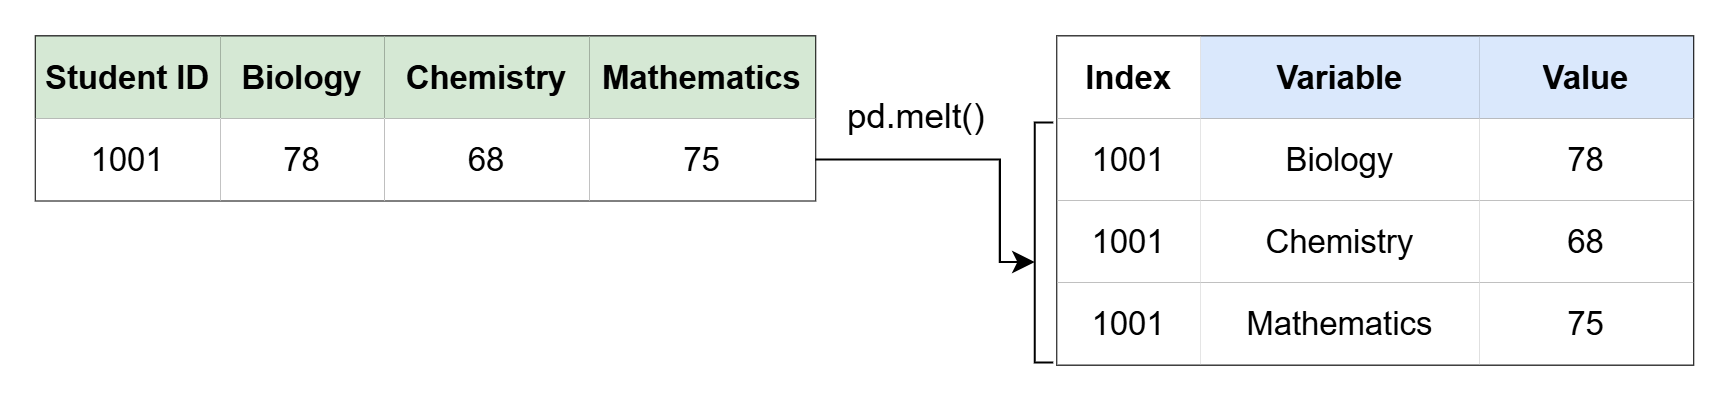

# 3. Implementation of Unpivot using melt()

In [19]:
df_wide

,Student_ID,Department,Midterm_Score,Final_Score,Assignments_Avg
0,101,CS,85,90,88
1,102,Engineering,78,82,75
2,103,Business,92,95,90


In [20]:
# Unpivot (melt) the DataFrame
# We want to keep 'Student_ID' and 'Department' as identifier variables.
# We want to unpivot 'Midterm_Score', 'Final_Score', and 'Assignments_Avg'.
# The new column names will be 'Score_Type' and 'Score_Value'.

df_long = df_wide.melt(
    id_vars=['Student_ID', 'Department'],
    value_vars=['Midterm_Score', 'Final_Score', 'Assignments_Avg'],
    var_name='Score_Type',
    value_name='Score_Value'
)

df_long

,Student_ID,Department,Score_Type,Score_Value
0,101,CS,Midterm_Score,85
1,102,Engineering,Midterm_Score,78
2,103,Business,Midterm_Score,92
3,101,CS,Final_Score,90
4,102,Engineering,Final_Score,82
5,103,Business,Final_Score,95
6,101,CS,Assignments_Avg,88
7,102,Engineering,Assignments_Avg,75
8,103,Business,Assignments_Avg,90


# COMPLETED